# RNN_Prediction of DAX movements (in progress)
In this notebook, I try to make a (quite simple) prediction for Dax movements using Recurrent Neural Networks (RNN). This notebook can't be used for a real use, as it is still too simple and some semantic errors within the training procedure do still exist. I'll try to update and to improve this notebooks as well as other financial analysis using Artificial Intelligence step by step. This notebook is inspired by the Udemy Course "Deep Learning, Neuronale Netze & AI: Der Komplettkurs" by Jannis Seemann, which covers basic layers, CNNs, RNNs, GPU use through cloud services up to Q Learning for the flappy bird game. I completed the course on 28.10.2020.

The DAX prices are provided from Thomson Reuters (University License). Starting from the template of the Udemy Course, I had to make several adjustements and additional calcuations to make the predictions better, flexibel,  the DAX data usable and the predictions to be real predictions (saying today how the Dax will move tomorrow).

In [1]:
daysToForecast = 2 # How many days to look ahead?
daysToTakeIntoAccountForForecast = 50 # How many (historic) days to take into account for calculating forecast?

#### You shouldn't change anything except the values above this line. 

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("../data/DAX_DATA/Price_History_daily_50y.csv")
df = df[::-1]

shift = daysToForecast
days = daysToTakeIntoAccountForForecast

df["Close_after"] = df["DAX 30 PERFORMANCE - PRICE INDEX"].shift(shift)
df["Close_changes"] = (df["Close_after"] / df["DAX 30 PERFORMANCE - PRICE INDEX"]) - 1
df["Close_changes"] = df["Close_changes"].shift(-1)

df = df.dropna()

changes = df["Close_changes"]

X = []
Y = []

for i in range(shift, len(changes) - days):
    Y.append(changes[i])
    X.append(np.array(changes[i+1:i+1+days][::-1]))
    
X = np.array(X).reshape(-1, days, 1)
Y = np.array(Y)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(100, input_shape=(50, 1)))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="mse")
model.fit(X, Y, batch_size=32, epochs=15)

Epoch 1/15
406/406 [==============================] - 12s 29ms/step - loss: 0.0025
Epoch 2/15
406/406 [==============================] - 12s 31ms/step - loss: 3.0747e-04
Epoch 3/15
406/406 [==============================] - 12s 29ms/step - loss: 3.0751e-04
Epoch 4/15
406/406 [==============================] - 12s 29ms/step - loss: 3.0741e-04
Epoch 5/15
406/406 [==============================] - 12s 29ms/step - loss: 3.0750e-04
Epoch 6/15
406/406 [==============================] - 12s 29ms/step - loss: 3.0748e-04
Epoch 7/15
406/406 [==============================] - 12s 29ms/step - loss: 3.0743e-04
Epoch 8/15
406/406 [==============================] - 12s 30ms/step - loss: 3.0748e-04
Epoch 9/15
406/406 [==============================] - 12s 29ms/step - loss: 3.0744e-04
Epoch 10/15
406/406 [==============================] - 12s 29ms/step - loss: 3.0746e-04
Epoch 11/15
406/406 [==============================] - 12s 29ms/step - loss: 3.0743e-04
Epoch 12/15
406/406 [========================

In [4]:
predictions = model.predict(X)
predictions = predictions.reshape(-1)
predictions = np.append(predictions, np.zeros(days))
predictions = np.append(np.zeros(shift), predictions)

df["predictions"] = predictions
df["Close_predicted"] = df["Close_after"] * (1 + df["predictions"])

###  Analysis / Printing of results
You shouldn't change anything except the the values (x1 and x2) below this line. The represent the range which shall be plotted in the next step.

In [5]:
x1 = 0 # change these two values to change the plotted range
x2 = 80 # x1 has to be less / before x2

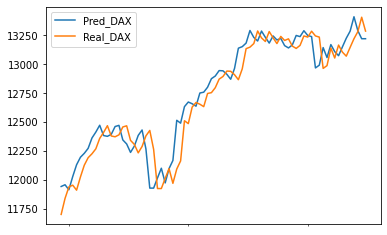

In [6]:
# https://matplotlib.org/gallery/text_labels_and_annotations/date.html

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# format the ticks
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

dates = np.array(df.index).astype(np.datetime64)

plt.plot(df.index[x1:x2], df["Close_predicted"][x1:x2], label="Pred_DAX")
plt.plot(df.index[x1:x2], df["DAX 30 PERFORMANCE - PRICE INDEX"][x1:x2], label="Real_DAX")
plt.legend()

plt.show()

#### Print whole data range

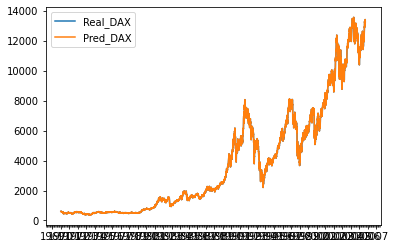

In [7]:
# https://matplotlib.org/gallery/text_labels_and_annotations/date.html

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# format the ticks
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

dates = np.array(df.index).astype(np.datetime64)

plt.plot(df.index, df["DAX 30 PERFORMANCE - PRICE INDEX"], label="Real_DAX")
plt.plot(df.index, df["Close_predicted"], label="Pred_DAX")

plt.legend()

plt.show()